## IPL Match Data Analysis !

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [How many matches analyzed in the dataset?](#section401)<br/>
    - 4.2 [How many seasons analyzed in the dataset?](#section402)<br/>
    - 4.3 [Which Team had won by maximum runs??](#section403)<br/>
    - 4.4 [Which Team had won by maximum wicket?](#section404)<br/>
    - 4.5 [Which Team had won by minimum wicket?](#section405)<br/>
    - 4.6 [Which season had most number of matches?](#section406)<br/>
    - 4.7 [The most successful IPL Team](#section407)<br/>
    - 4.8 [Has Toss-winning helped in Match-winning?](#section408)<br/>
    - 4.9 [Indivisual Team Performance (Win by Runs and Win by Wickets)](#section409)<br/>
    - 4.10 [Matches Won by Team Seasonwise](#section410)<br/>
5. [Conclusions](#section5)<br/>  

### 1. Problem Statement

Data Exploration of IPL matches

This is the __IPL__ __Matches__ analysis based on provided data where we will use possible analysis of IPL Matches by using __Python__ library and visulaize them.

### 2. Data Loading and Description
<img src="https://d1kuqs143iyp10.cloudfront.net/1170x/58ecb769e4b0dd1df70cc672-58ecc410e4b0dd1df70cc718-blog-_image-IPL-allteam.png?raw=true" width="1366" height="760" /> 

#### Some Background Information
The __Indian Premier League (IPL)__, officially __Vivo Indian Premier League__ for sponsorship reasons, is a professional Twenty20 cricket league in India __contested during April and May of every year by teams__ representing __8 Indian cities and some states__.The league was __founded__ by the __Board of Control for Cricket in India (BCCI) in 2008__, and is regarded as the brainchild of Lalit Modi, the founder and former commissioner of the league.IPL has an exclusive window in ICC Future Tours Programme.

The IPL is the most-attended cricket league in the world and in 2014 ranked sixth by average attendance among all sports leagues. In 2010, the IPL became the first sporting event in the world to be broadcast live on YouTube.

There have been eleven seasons of the IPL tournament. The __current IPL title holders__ are the __Chennai Super Kings, who won the 2018 season__. 

#### Importing packages                                          

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output



#### Importing the Dataset

In [2]:
ipl_data = pd.read_csv("matches.csv")     # Importing  dataset using pd.read_csv

## 3. Data Profiling

### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end


In [3]:
ipl_data.shape                                                    # This will print the number of rows and comlumns of the Data Frame

(696, 18)

IPL has __696 rows__ and __18 columns.__

In [4]:
ipl_data.columns                                            # This will print the names of all columns.

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
ipl_data.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [6]:
ipl_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
ipl_data.tail()                                                   # This will print the last n rows of the Data Frame

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
691,7949,2018,Pune,20/05/18,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,L Ngidi,Maharashtra Cricket Association Stadium,Nitin Menon,Yeshwant Barde,Marais Erasmus
692,7950,2018,Mumbai,22/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,2,F du Plessis,Wankhede Stadium,Marais Erasmus,C Shamshuddin,S Ravi
693,7951,2018,Kolkata,23/05/18,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kolkata Knight Riders,25,0,AD Russell,Eden Gardens,Nitin Menon,Anil Chaudhary,Kumar Dharmasena
694,7952,2018,Kolkata,25/05/18,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,14,0,Rashid Khan,Eden Gardens,Nitin Menon,Kumar Dharmasena,Anil Chaudhary
695,7953,2018,Mumbai,27/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,SR Watson,Wankhede Stadium,Marais Erasmus,S Ravi,Nitin Menon


In [8]:
ipl_data.info()                                                   # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
id                 696 non-null int64
season             696 non-null int64
city               689 non-null object
date               696 non-null object
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
umpire1            695 non-null object
umpire2            695 non-null object
umpire3            60 non-null object
dtypes: int64(5), object(13)
memory usage: 98.0+ KB


In [9]:
ipl_data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,974.103448,2012.965517,0.027299,13.472701,3.349138
std,2143.239623,3.069266,0.163070,23.607994,3.411398
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,174.750000,2010.000000,0.000000,0.000000,0.000000
50%,348.500000,2013.000000,0.000000,0.000000,3.000000
75%,522.250000,2016.000000,0.000000,19.000000,6.000000
max,7953.000000,2018.000000,1.000000,146.000000,10.000000


In [10]:
ipl_data.describe(include='all')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,696.000000,696.000000,689,696,696,696,696,696,696,696.000000,693,696.000000,696.000000,693,696,695,695,60
unique,NaN,NaN,32,498,14,14,14,2,3,NaN,14,NaN,NaN,214,35,55,58,18
top,NaN,NaN,Mumbai,2016-05-22,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,M Chinnaswamy Stadium,HDPK Dharmasena,S Ravi,C Shamshuddin
freq,NaN,NaN,94,2,91,90,90,413,686,NaN,98,NaN,NaN,20,73,73,56,6
mean,974.103448,2012.965517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027299,NaN,13.472701,3.349138,NaN,NaN,NaN,NaN,NaN
std,2143.239623,3.069266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.163070,NaN,23.607994,3.411398,NaN,NaN,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,174.750000,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,348.500000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,3.000000,NaN,NaN,NaN,NaN,NaN
75%,522.250000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


In [11]:
ipl_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

From the above output we can see that __umpire3__ column contains __maximum null values__. We will see how to deal with them.

In [12]:
ipl_data.sample(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
118,119,2009,Cape Town,2009-04-18,Royal Challengers Bangalore,Rajasthan Royals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,75,0,R Dravid,Newlands,BR Doctrove,RB Tiffin,NaN
586,587,2016,Bangalore,2016-04-17,Royal Challengers Bangalore,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,7,Q de Kock,M Chinnaswamy Stadium,VA Kulkarni,A Nand Kishore,NaN
587,588,2016,Hyderabad,2016-04-18,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,7,DA Warner,"Rajiv Gandhi International Stadium, Uppal",HDPK Dharmasena,VK Sharma,NaN
261,262,2011,Chennai,2011-04-25,Chennai Super Kings,Pune Warriors,Pune Warriors,field,normal,0,Chennai Super Kings,25,0,MEK Hussey,"MA Chidambaram Stadium, Chepauk",Aleem Dar,RB Tiffin,NaN
276,277,2011,Mumbai,2011-05-04,Mumbai Indians,Pune Warriors,Pune Warriors,field,normal,0,Mumbai Indians,21,0,R Sharma,Dr DY Patil Sports Academy,HDPK Dharmasena,SJA Taufel,NaN
34,35,2017,Chandigarh,2017-04-30,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan,NaN
61,62,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
578,579,2016,Chandigarh,2016-04-11,Kings XI Punjab,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,5,AJ Finch,"Punjab Cricket Association IS Bindra Stadium, ...",AK Chaudhary,VA Kulkarni,NaN
52,53,2017,Kolkata,2017-05-13,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Mumbai Indians,9,0,AT Rayudu,Eden Gardens,A Nand Kishore,S Ravi,NaN
124,125,2009,Durban,2009-04-23,Delhi Daredevils,Chennai Super Kings,Delhi Daredevils,bat,normal,0,Delhi Daredevils,9,0,AB de Villiers,Kingsmead,BR Doctrove,SJA Taufel,NaN


### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [13]:
profile = pandas_profiling.ProfileReport(ipl_data)
profile.to_file(outputfile="ipl_before_preprocessing.html")

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __ipl_before_preprocessing.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

### 3.3 Preprocessing

- Dealing with missing values<br/>
    - Dropping the column __'Umpire3'__ as it has too many _null_ values.

In [14]:
ipl_data.drop('umpire3', axis = 1,inplace = True)

In [15]:
ipl_data.describe(include='all')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
count,696.000000,696.000000,689,696,696,696,696,696,696,696.000000,693,696.000000,696.000000,693,696,695,695
unique,NaN,NaN,32,498,14,14,14,2,3,NaN,14,NaN,NaN,214,35,55,58
top,NaN,NaN,Mumbai,2016-05-22,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,M Chinnaswamy Stadium,HDPK Dharmasena,S Ravi
freq,NaN,NaN,94,2,91,90,90,413,686,NaN,98,NaN,NaN,20,73,73,56
mean,974.103448,2012.965517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027299,NaN,13.472701,3.349138,NaN,NaN,NaN,NaN
std,2143.239623,3.069266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.163070,NaN,23.607994,3.411398,NaN,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,174.750000,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,348.500000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,3.000000,NaN,NaN,NaN,NaN
75%,522.250000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN


In [16]:
ipl_data.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan


In [17]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(ipl_data)
profile.to_file(outputfile="ipl_after_preprocessing.html")

## 3.4 Post  Profiling

### 4. Questions

### 4.1 How many matches Analyzed in the dataset?

As we’ve seen above, id is a variable that counts each observation in the data while each observation is a match. So to get the number of matches in our dataset is as same as to get the number of rows in the dataset or maximum value of the variable id.

In [18]:
ipl_data['id'].count()

696

696 IPL Matches is what I’ve got in our dataset

### 4.2 How many seasons Analyzed in the dataset?

IPL like any other Sports league, happens once in a year and so getting the number of unique years we’ve got in the dataset will tell us how many seasons we’ve got in the dataset.

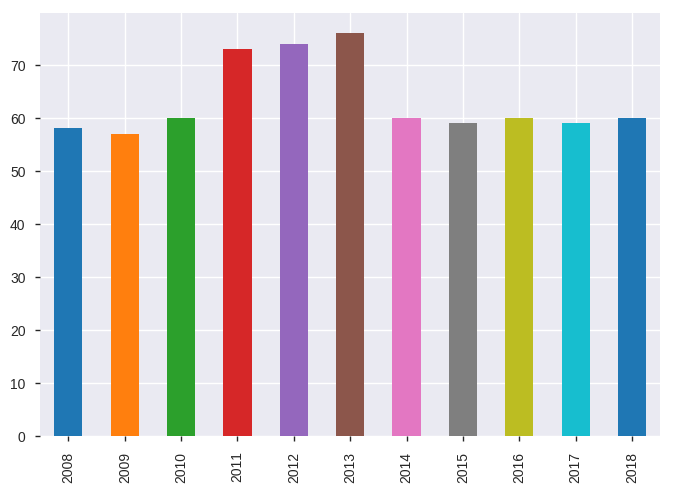

In [19]:
ipl_data['season'].value_counts().sort_index().plot.bar()

That gives the list of years, but to answer the question with just the required answer, let’s calculate length of the list that was returned in the above step 

In [20]:
len(ipl_data['season'].unique())

11

### 4.3 Which Team had won by maximum runs?

In [21]:
ipl_data.iloc[ipl_data['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object

In [22]:
ipl_data.iloc[ipl_data['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

### 4.4 Which Team had won by maximum wickets?

In [23]:
ipl_data.iloc[ipl_data['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

### 4.5 Which Team had won by minimum wickets?

In [24]:
ipl_data.iloc[ipl_data['win_by_wickets'].idxmin()]['winner']

'Sunrisers Hyderabad'

### 4.6 Which season had most number of matches?

We know that if each row is a match, then counting the number of rows of every season would give us the number of matches for every season.

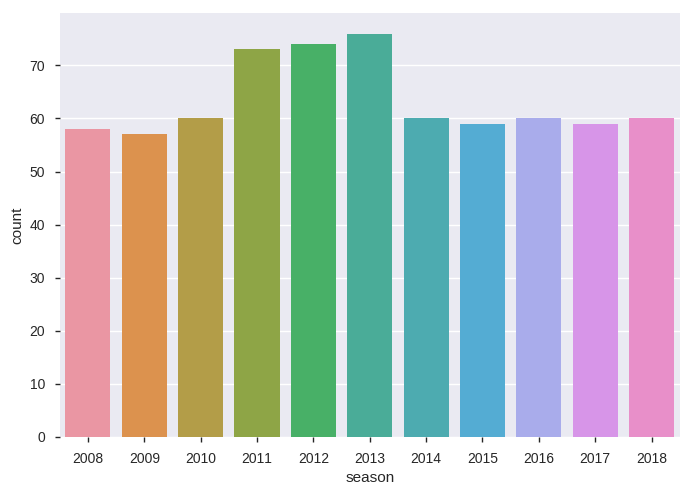

In [25]:
sns.countplot(x='season',data=ipl_data)
plt.show()

### 4.7 The most successful IPL Team

The most successful IPL team is the team that has won most number of times.

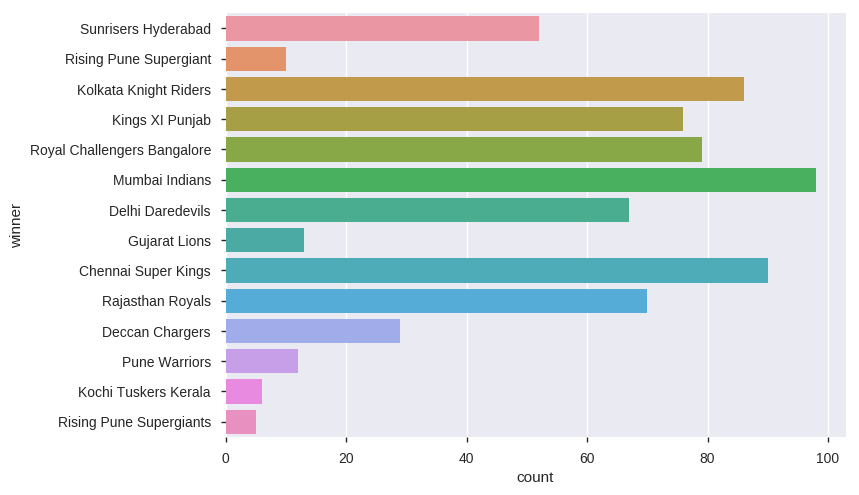

In [26]:
sns.countplot(y='winner',data = ipl_data)
plt.show()

###### I can use plot bar also for this distribution!

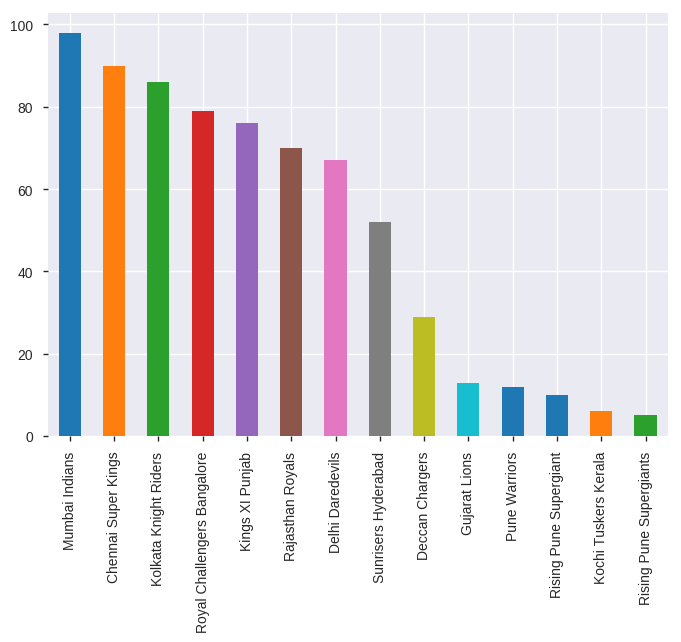

In [27]:
winner_data = ipl_data['winner'].value_counts()
winner_data.plot.bar()

### 4.8 Has Toss-winning helped in Match-winning?

In [28]:
match_winner = ipl_data['winner']== ipl_data['toss_winner']
ipl_data.groupby(match_winner).size()

False    339
True     357
dtype: int64

##### Visualization of Result

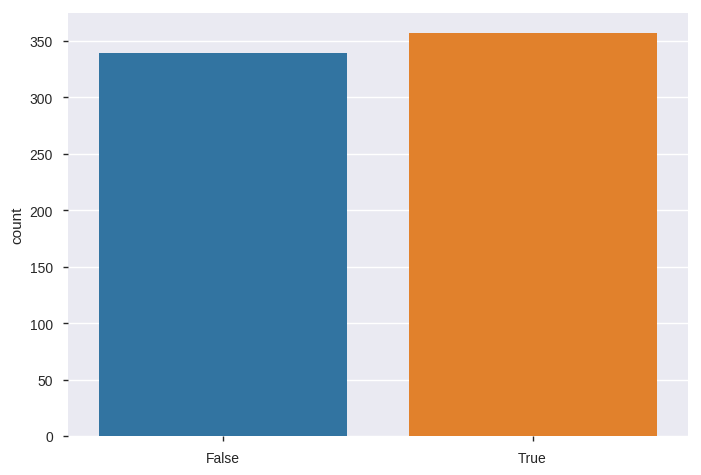

In [29]:
sns.countplot(ipl_data['winner']== ipl_data['toss_winner'])
plt.show()

### 4.9  Indivisual Team Performance (Win by Runs and Win by Wickets)

##### 4.9.1 Winning By Runs Indivisual Team Performance

In [30]:
ipl_data[ipl_data['win_by_runs']>0].groupby(['winner'])['win_by_runs'].apply(np.median).sort_values(ascending = False)

winner
Rising Pune Supergiants        26.5
Rajasthan Royals               26.0
Mumbai Indians                 25.0
Chennai Super Kings            24.0
Kolkata Knight Riders          23.5
Pune Warriors                  23.0
Royal Challengers Bangalore    21.0
Rising Pune Supergiant         20.0
Kings XI Punjab                19.0
Delhi Daredevils               17.0
Sunrisers Hyderabad            15.0
Deccan Chargers                14.5
Kochi Tuskers Kerala           11.5
Gujarat Lions                   1.0
Name: win_by_runs, dtype: float64

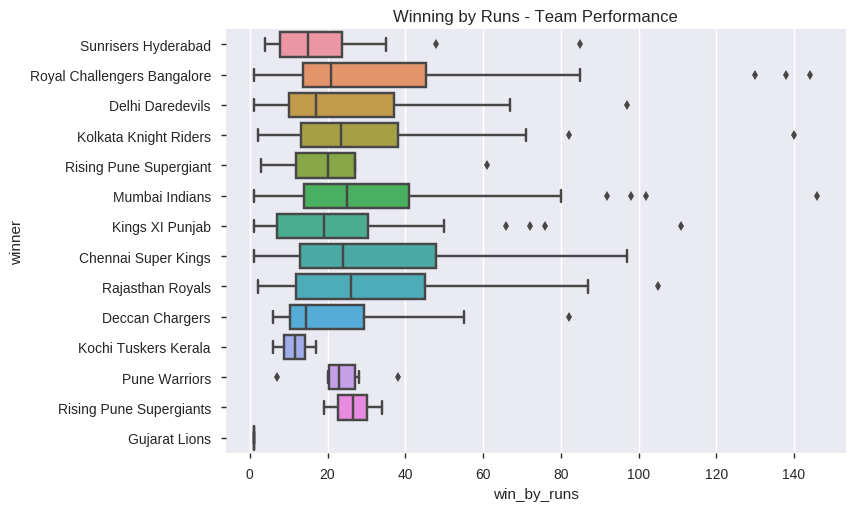

In [31]:
fig, ax = plt.subplots()
ax.set_title("Winning by Runs - Team Performance")
sns.boxplot(y = 'winner', x = 'win_by_runs', data=ipl_data[ipl_data['win_by_runs']>0], orient = 'h'); 
plt.show()

##### 4.9.2 Winning By Wickets Indivisual Team Performance

In [32]:
ipl_data[ipl_data['win_by_wickets']>0].groupby(['winner'])['win_by_wickets'].apply(np.median).sort_values(ascending = False)

winner
Kochi Tuskers Kerala           7.5
Sunrisers Hyderabad            7.0
Rising Pune Supergiants        7.0
Royal Challengers Bangalore    6.5
Pune Warriors                  6.5
Delhi Daredevils               6.5
Rising Pune Supergiant         6.0
Rajasthan Royals               6.0
Mumbai Indians                 6.0
Kolkata Knight Riders          6.0
Kings XI Punjab                6.0
Gujarat Lions                  6.0
Deccan Chargers                6.0
Chennai Super Kings            6.0
Name: win_by_wickets, dtype: float64

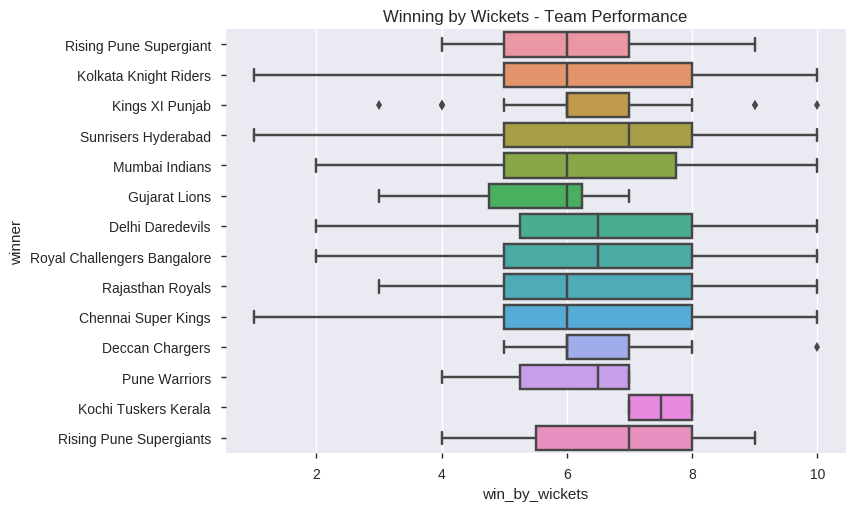

In [33]:
fig, ax = plt.subplots()
ax.set_title("Winning by Wickets - Team Performance")
sns.boxplot(y = 'winner', x = 'win_by_wickets', data=ipl_data[ipl_data['win_by_wickets']>0], orient = 'h'); 
plt.show()

<a id=section410></a>

### 4.10 Matches Won by Team Seasonwise

Text(0,0.5,'Team')

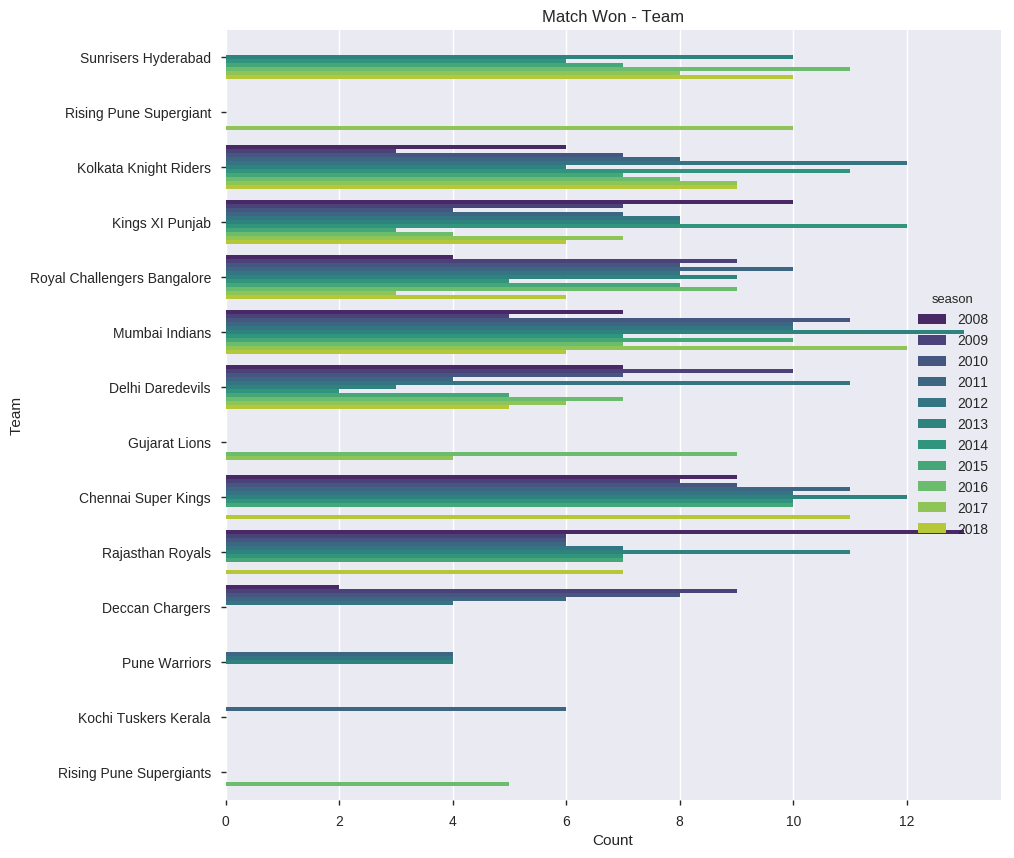

In [34]:
# Matches Won by Team Seasonwise
plt.figure(figsize= (10,10))
sns.countplot(y='winner',hue='season', data= ipl_data, palette= 'viridis')
plt.title('Match Won - Team')
plt.xlabel('Count')
plt.ylabel('Team')

### Conclusion
- We used the dataset containing 696 match data in order to predict the outcome of the  Indian Premier League match.
- These number of matches details were obtained after putting the dataset through cleaning and pre-processing.
- Based On these data we conclude that Mumbai Indians is the the most winning team in whole IPL.
- There have been eleven seasons of the IPL tournament.
- The current IPL title holders are the Chennai Super Kings, who won the 2018 season.
- The most successful franchises in the tournament are the Chennai Super Kings and Mumbai        Indians with 3 tournament wins each.
- Whoever team won the toss most probably they won the match.
- 2013 season had played the most number of matches. 
- Most Successful team roll played as Mumbai Indians. 